<a href="https://colab.research.google.com/github/E1250/cnn_cv-ref/blob/main/CAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Lecture - https://www.youtube.com/watch?v=C7hXRKpEkAY&list=PLyhJeMedQd9T-jQgrOxKiuJ_Q0plUeMfF&index=3
* GitHub - https://github.com/AhmedIbrahimai/Deep-Convolution-AutoEncoder-computer-vision/blob/main/CAE.ipynb

## Deep Convolutional AE

In [1]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input
import cv2
import os
import numpy as np

In [2]:
# dataset from keras
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


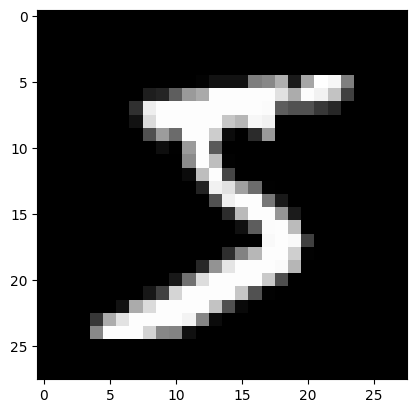

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'gray');

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# Normalizing - Diviging by Max
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_train.shape

(60000, 28, 28, 1)

## Model

In [7]:
# Creating the model
# > Note the MaxPool and UpSampling Here
input_layer = Input(shape = (28,28,1))

# Encoder
x = Conv2D(16, (3,3), activation = 'relu', padding = 'same')(input_layer) # Note!
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

# Decoder
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(encoded) # Note!
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation = 'relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation = 'relu', padding = 'same')(x)

In [8]:
# > Note Input shape (First) is the same as Output shape (Second)
autoencoder = Model(input_layer, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [9]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [10]:
# Note the input data are all INPUT training data (unsupervised learning)
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size = 128, validation_data=(X_test,X_test))

469/469 [==============================] - 3s 6ms/step - loss: 0.1455 - val_loss: 0.1360
Epoch 43/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1369 - val_loss: 0.1350
Epoch 44/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1396 - val_loss: 0.1369
Epoch 45/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1360 - val_loss: 0.1392
Epoch 46/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1387 - val_loss: 0.1343
Epoch 47/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1516 - val_loss: 0.1531
Epoch 48/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1403 - val_loss: 0.1411
Epoch 49/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1314 - val_loss: 0.1266
Epoch 50/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1315 - val_loss: 0.2129


Splitting encoder and decoder from the autoencoder model

In [11]:
encoder = Model(input_layer, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [12]:
decoder_layer = Input(shape = (4,4,8))

decoder = autoencoder.layers[7](decoder_layer)

for layer in autoencoder.layers[8:]:
    decoder = layer(decoder)

decoder = Model(decoder_layer, decoder, name = 'Decoder')
decoder.summary()

Model: "Decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168

## Predicting

In [13]:
# encoder images for testing (Compressing)
encoded_images = encoder.predict(X_test, verbose = 1)
encoded_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 4, 4, 8)

In [14]:
# Decompressing
decoded_images = decoder.predict(encoded_images, verbose=1)
decoded_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

Shape  (10000, 28, 28)


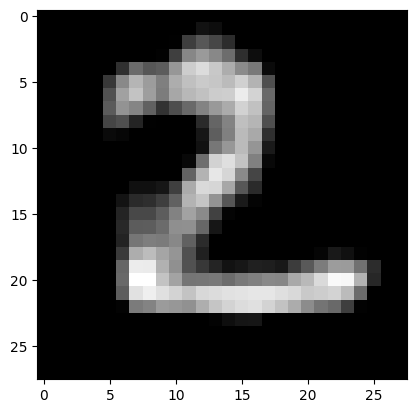

In [17]:
# Reshaping the image to show
decoded_images = decoded_images.reshape(decoded_images.shape[0], 28,28)
print("Shape ",decoded_images.shape)

plt.imshow(decoded_images[1], cmap = 'gray');

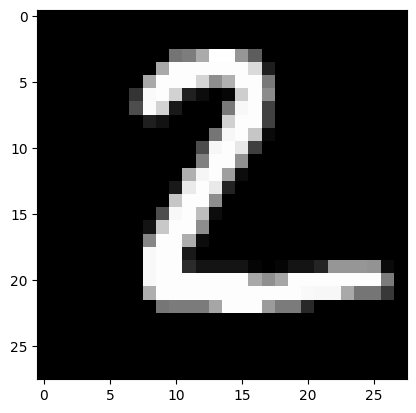

In [18]:
# Showing real image
X_test = X_test.reshape(X_test.shape[0], 28,28)
plt.imshow(X_test[1], cmap = 'gray');